### 선형회귀 이해하기
- 성적데이터를 기반으로 선형회귀를 이해해보자

In [2]:
# 성적데이터 생성을 위한 데이터 분석 라이브러리 3대장 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 성적데이터 생성
data = pd.DataFrame([[2, 20], [4, 40], [8, 80], [9, 90]],
                    index = ['승호', '영표', '자영', '민수'],
                    columns = ['시간', '성적'])
data

,시간,성적
승호,2,20
영표,4,40
자영,8,80
민수,9,90


### LinearRegression(선형회귀) -> 수학 공식을 활용한 해석적 모델
- 공식을 이용해서 적은 계산으로 한번에 최적의 선형함수를 찾는 방법
- 공식이 완벽하지 않을 경우 잘 못 찾을 수도 있고
- 공식이 잘못되었더라도 고칠 수 없다는 문제가 있다 --> 규제를 접목해서 해결

In [5]:
# 파이썬에서 머신러닝 모델 종류를 많이 포함하고 있는 라이브러리 -> sklearn
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()  # 모델 객체 생성 -> 하이퍼파라미터 튜닝(조정)

# 학습
linear_model.fit(data[['시간']], data['성적'])   # 문제데이터 : 2차원, 답데이터 : 1차원

LinearRegression()

#### y = wx + b
- x는 독립변수 -> 문제데이터
- y는 종속변수 -> 답데이터

In [7]:
# w값(가중치, 기울기)과 b(절편, 편향)값을 알아내보자
display('기울기, 가중치 :', linear_model.coef_)
display('절편, 편향 :', linear_model.intercept_)

'기울기, 가중치 :'

array([10.])

'절편, 편향 :'

7.105427357601002e-15

In [8]:
# 그럼 만약, 새로운 데이터가 들어온다면 맞출 수 있을까?
linear_model.predict([[7]])

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

#### H(x)
- 가설함수

In [10]:
# 함수 정의
def h(w ,x):
    return w * x + 0

#### 비용함수(cost function) 정의
- 비용 == 오차

In [12]:
# 비용함수 정의
# data : 문제
# target : 답(실제 정답)
# weight : 가중치
def cost(data, target, weight):
    # 예측
    y_pre = h(weight, data)
    # 평균제곱오차 = ((예측값 - 실제값) ** 2).mean()
    error = ((y_pre - target) ** 2).mean()
    return error

In [13]:
# 가중치(기울기)가 실제 기울기와 달랐을 때의 오차값
cost(data['시간'], data['성적'], 5)

1031.25

In [14]:
cost(data['시간'], data['성적'], 8)

165.0

In [15]:
cost(data['시간'], data['성적'], 10)

0.0

In [16]:
# 가중치 변화에 따른 비용함수의 변화를 그래프로 그려보자
cost_lst = []

for w in range(1, 20):  # 1 ~ 19까지 가중치에 변화
    err = cost(data['시간'], data['성적'], w)
    cost_lst.append(err)
cost_lst

[3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25]

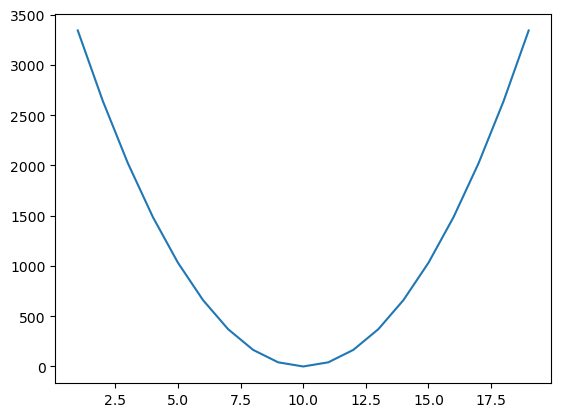

In [19]:
# 비용함수(MSE) 값을 그래프로 나타내보자
plt.plot(range(1, 20), cost_lst)
plt.show()

In [30]:
linear_model.score(data[['시간']], data['성적'])   # 100점
# 분류모델에서는 score -> 정확도
# 회귀모델에서는 score -> 유사도(MSE에 기반해서 R^2 score)

1.0

### 경사하강법
- SGDRegressor
- 점진적으로 오차가 작은 선형함수를 찾아가는 방법
- 오차를 수정하는 방향으로 그래프를 다시 그려줌
- 선형함수를 잘못 찾았을 경우 수정이 가능
- 점진적으로 찾아가므로 계산량이 많아 시간이 오래걸림

In [35]:
from sklearn.linear_model import SGDRegressor

# 모델생성 및 하이퍼파라미터 조정(튜닝)
sgd_model = SGDRegressor(max_iter = 5000,   # 가중치 업데이트 반복 횟수
                         eta0 = 0.001,      # 학습률(learning rate), 보폭
                         verbose = 1 )      # 학습과정을 눈으로 확인
# 학습
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.40, NNZs: 1, Bias: 0.187933, T: 4, Avg. loss: 1872.484469
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.23, NNZs: 1, Bias: 0.306252, T: 8, Avg. loss: 1424.174833
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.93, NNZs: 1, Bias: 0.402347, T: 12, Avg. loss: 1162.160503
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.50, NNZs: 1, Bias: 0.482430, T: 16, Avg. loss: 963.381518
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.00, NNZs: 1, Bias: 0.551779, T: 20, Avg. loss: 812.361736
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.44, NNZs: 1, Bias: 0.612564, T: 24, Avg. loss: 689.955071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.83, NNZs: 1, Bias: 0.666515, T: 28, Avg. loss: 591.552357
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.18, NNZs: 1, Bias: 0.714907, T: 32, Avg. loss: 509.421186
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.49, NNZs: 1, Bias: 0.758454, T: 36, Avg. loss: 441.509590
Total training time: 0.00 

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [37]:
# 예측
sgd_model.predict([[7]])   # 새로운 문제를 주고 예측해보세요~ (공부를 잘했는지 확인)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88309491])

In [39]:
# 기울기(w), 편향(b) 값 확인하기
display('기울기, 가중치 :', sgd_model.coef_)
display('절편, 편향 :', sgd_model.intercept_)

'기울기, 가중치 :'

array([9.79374514])

'절편, 편향 :'

array([1.32687895])

In [41]:
sgd_model.score(data[['시간']], data['성적'])
# R^2 score = 99.9점

0.9995503369629323